In [2]:
import pandas as pd
import numpy as np

In [3]:
df1=pd.read_csv("/home/rsingla1/project_data_latest.csv")

In [4]:
bins=[-1,2,6,10,11]
group_names=['0','1','2','3']
df1['performance']=pd.cut(df1['playoff_wins'],bins,labels=group_names)
df2=df1[["performance"]]


In [5]:
df1.columns

Index(['year', 'Tm', 'playoff_wins', 'world_series_ind', 'round', 'hit_numBat',
       'hit_BatAge', 'hit_RG', 'hit_G', 'hit_PA', 'hit_AB', 'hit_R_scored',
       'hit_H', 'hit_2B', 'hit_3B', 'hit_HR', 'hit_RBI', 'hit_SB', 'hit_CS',
       'hit_BB', 'hit_SO', 'hit_BA', 'hit_OBP', 'hit_SLG', 'hit_OPS',
       'hit_OPS+', 'hit_TB', 'hit_GDP', 'hit_HBP', 'hit_SH', 'hit_SF',
       'hit_IBB', 'hit_LOB', 'pitch_numP', 'pitch_PAge', 'pitch_RAG',
       'pitch_W', 'pitch_L', 'pitch_WL', 'pitch_ERA', 'pitch_G', 'pitch_GS',
       'pitch_GF', 'pitch_CG', 'pitch_tSho', 'pitch_cSho', 'pitch_SV',
       'pitch_IP', 'pitch_H', 'pitch_R_allowed', 'pitch_ER', 'pitch_HR',
       'pitch_BB', 'pitch_IBB', 'pitch_SO', 'pitch_HBP', 'pitch_BK',
       'pitch_WP', 'pitch_BF', 'pitch_ERAplus', 'pitch_FIP', 'pitch_WHIP',
       'pitch_H9', 'pitch_HR9', 'pitch_BB9', 'pitch_SO9', 'pitch_SOW',
       'pitch_LOB', 'performance'],
      dtype='object')

In [6]:
df1.drop(["round","playoff_wins","performance","Tm","world_series_ind"],axis=1,inplace=True)

In [7]:
#use linear regression as the model for feature selection
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
name=df1.columns.values
name
lr = LinearRegression()
#rank all features, i.e continue the elimination until the last one
rfe = RFE(lr, n_features_to_select=1)
rfe.fit(df1,df2)
print ("Features sorted by their rank:")
print (sorted(zip(map(lambda x: round(x, 4), rfe.ranking_),name)))

Features sorted by their rank:
[(1, 'hit_OBP'), (2, 'hit_OPS'), (3, 'hit_SLG'), (4, 'hit_BA'), (5, 'pitch_WHIP'), (6, 'pitch_BB9'), (7, 'pitch_H9'), (8, 'pitch_HR9'), (9, 'pitch_FIP'), (10, 'pitch_WL'), (11, 'hit_RG'), (12, 'pitch_ERA'), (13, 'pitch_SOW'), (14, 'pitch_SO9'), (15, 'pitch_W'), (16, 'pitch_GS'), (17, 'pitch_G'), (18, 'hit_G'), (19, 'pitch_RAG'), (20, 'pitch_PAge'), (21, 'pitch_CG'), (22, 'pitch_GF'), (23, 'hit_BatAge'), (24, 'pitch_ER'), (25, 'pitch_H'), (26, 'pitch_BB'), (27, 'pitch_IP'), (28, 'pitch_cSho'), (29, 'pitch_BK'), (30, 'hit_H'), (31, 'hit_AB'), (32, 'hit_SF'), (33, 'hit_SH'), (34, 'hit_PA'), (35, 'pitch_L'), (36, 'pitch_SO'), (37, 'hit_LOB'), (38, 'pitch_LOB'), (39, 'pitch_BF'), (40, 'pitch_R_allowed'), (41, 'hit_TB'), (42, 'hit_RBI'), (43, 'pitch_tSho'), (44, 'hit_HR'), (45, 'pitch_numP'), (46, 'hit_BB'), (47, 'hit_HBP'), (48, 'hit_GDP'), (49, 'year'), (50, 'hit_CS'), (51, 'pitch_WP'), (52, 'pitch_HBP'), (53, 'hit_R_scored'), (54, 'hit_2B'), (55, 'pitch_HR')

/usr/lib64/python3.4/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [8]:
# Feature Selection using Extra Tree Classifier
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier
# fit an Extra Trees model to the data
model = ExtraTreesClassifier()
model.fit(df1,df2)
#y=k_scores.append(x.mean())
# display the relative importance of each attribute
print (sorted(zip(map(lambda x: round(x, 4), model.feature_importances_),name), 
             reverse=True))

[(0.027300000000000001, 'pitch_BB'), (0.025600000000000001, 'hit_BA'), (0.024, 'pitch_ER'), (0.023800000000000002, 'hit_CS'), (0.023699999999999999, 'hit_numBat'), (0.023099999999999999, 'hit_OPS+'), (0.022499999999999999, 'pitch_H'), (0.021999999999999999, 'pitch_numP'), (0.021899999999999999, 'pitch_IBB'), (0.021399999999999999, 'hit_AB'), (0.021100000000000001, 'pitch_WHIP'), (0.0201, 'hit_2B'), (0.02, 'pitch_tSho'), (0.019900000000000001, 'hit_TB'), (0.019900000000000001, 'hit_SO'), (0.0195, 'pitch_WP'), (0.018800000000000001, 'pitch_SV'), (0.018499999999999999, 'hit_H'), (0.0184, 'pitch_SO9'), (0.0183, 'pitch_FIP'), (0.018200000000000001, 'hit_3B'), (0.017899999999999999, 'hit_OPS'), (0.0178, 'pitch_HBP'), (0.0177, 'pitch_R_allowed'), (0.017000000000000001, 'pitch_BB9'), (0.0167, 'hit_RG'), (0.016500000000000001, 'hit_SF'), (0.016299999999999999, 'pitch_WL'), (0.016299999999999999, 'hit_OBP'), (0.015800000000000002, 'pitch_PAge'), (0.015599999999999999, 'pitch_IP'), (0.0154, 'pitc

/usr/lib/python3.4/site-packages/ipykernel/__main__.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


In [9]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np
rf = RandomForestRegressor()
rf.fit(df1, df2)
print ("Features sorted by their score:")
print (sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), name), 
             reverse=True))

Features sorted by their score:
[(0.108, 'hit_2B'), (0.057599999999999998, 'pitch_H'), (0.051999999999999998, 'hit_SO'), (0.0395, 'hit_GDP'), (0.038199999999999998, 'pitch_SV'), (0.037699999999999997, 'pitch_WP'), (0.036900000000000002, 'pitch_WL'), (0.036299999999999999, 'pitch_HBP'), (0.035700000000000003, 'hit_IBB'), (0.031099999999999999, 'pitch_IBB'), (0.030099999999999998, 'hit_BB'), (0.026499999999999999, 'pitch_ERAplus'), (0.0258, 'hit_3B'), (0.024299999999999999, 'pitch_PAge'), (0.021600000000000001, 'pitch_FIP'), (0.019400000000000001, 'pitch_BB'), (0.018700000000000001, 'pitch_SOW'), (0.0178, 'hit_AB'), (0.0177, 'pitch_SO'), (0.017500000000000002, 'hit_HBP'), (0.016500000000000001, 'hit_OBP'), (0.015599999999999999, 'pitch_IP'), (0.014500000000000001, 'pitch_L'), (0.0144, 'pitch_HR'), (0.0137, 'pitch_GF'), (0.012699999999999999, 'pitch_numP'), (0.0121, 'hit_SH'), (0.0115, 'hit_BatAge'), (0.0112, 'hit_LOB'), (0.010999999999999999, 'pitch_R_allowed'), (0.0103, 'hit_numBat'), (

/usr/lib/python3.4/site-packages/ipykernel/__main__.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


In [10]:
#Using top 29 columns based on Random Forest Regessor to predict the performance of different teams 
columns=['hit_OBP','hit_OPS','hit_SLG','hit_BA','pitch_WHIP','pitch_BB9','pitch_H9','pitch_HR9','pitch_FIP','pitch_WL',
         'hit_RG','pitch_ERA','pitch_SOW','pitch_SO9','pitch_W','pitch_GS','pitch_G','hit_G','pitch_RAG','pitch_PAge',
         'pitch_CG','pitch_GF','hit_BatAge','pitch_ER','pitch_H','pitch_BB','pitch_IP','pitch_cSho','pitch_BK']
df3=df1[list(columns)].values
from sklearn.cross_validation import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df3,df2,test_size=0.4)

/usr/lib64/python3.4/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


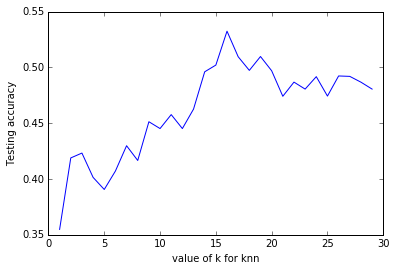

In [23]:
#Applying knn on fist 29 features features to select k-nearest neighbor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import cross_val_score
columns=['hit_OBP','hit_OPS','hit_SLG','hit_BA','pitch_WHIP','pitch_BB9','pitch_H9','pitch_HR9','pitch_FIP','pitch_WL',
         'hit_RG','pitch_ERA','pitch_SOW','pitch_SO9','pitch_W','pitch_GS','pitch_G','hit_G','pitch_RAG','pitch_PAge',
         'pitch_CG','pitch_GF','hit_BatAge','pitch_ER','pitch_H','pitch_BB','pitch_IP','pitch_cSho','pitch_BK']
df3=df1[list(columns)].values
a=np.array(df2)
df4=a.ravel()
k_range=range(1,30)
k_scores=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,df3,df4,cv=10,scoring="accuracy")   
    k_scores.append(scores.mean())
    
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(k_range,k_scores)
plt.xlabel('value of k for knn')
plt.ylabel('Testing accuracy')


In [23]:
#Using top 29 columns based on Random Forest Regessor to predict the performance of different teams by knn model
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


from sklearn import metrics
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
print(metrics.accuracy_score(y_test,y_pred))
print(metrics.precision_score(y_test,y_pred,average='macro'))
print(metrics.recall_score(y_test, y_pred, average='macro'))
print(metrics.f1_score(y_test, y_pred, average='macro'))
print(y_test)
print(y_pred)

0.5
0.125
0.25
0.166666666667
    performance
167           0
168           3
169           2
170           1
171           0
172           0
173           1
174           0
['0' '0' '0' '0' '0' '0' '0' '0']


/usr/lib/python3.4/site-packages/ipykernel/__main__.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/lib64/python3.4/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/lib64/python3.4/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [72]:
#Applying KNN on same x_train,y_train,x_test and y_test to predict the performance of different
#teams by KNN Model
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(new_x_train,new_y_train)
y_pred=knn.predict(new_x_test)
print(metrics.accuracy_score(new_y_test,y_pred))
print(metrics.precision_score(new_y_test,y_pred,average='macro'))
print(metrics.recall_score(new_y_test, y_pred, average='macro'))
print(metrics.f1_score(new_y_test, y_pred, average='macro'))
print(new_y_test,y_pred)


0.342857142857
0.294429050356
0.274774774775
0.27946969697
    performance
80            0
10            0
125           0
76            0
26            1
98            1
31            0
36            1
118           0
168           3
18            2
54            0
58            1
15            0
141           1
136           0
41            2
172           0
56            0
111           0
32            2
154           0
0             3
116           3
150           0
63            0
45            0
47            3
170           1
169           2
..          ...
142           0
135           0
77            1
83            1
81            3
138           1
4             0
11            0
93            0
38            0
120           0
89            0
102           0
149           0
59            0
61            2
127           0
106           0
64            1
16            1
49            0
112           0
37            3
29            2
78            2
25            0
67           

/usr/lib/python3.4/site-packages/ipykernel/__main__.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


In [24]:
#Applying Logistic Regression on same x_train,y_train,x_test and y_test to predict the performance of different
#teams by Logistic Regression Model
from sklearn.linear_model import LogisticRegression
columns=['hit_OBP','hit_BA','hit_OPS','hit_SLG','pitch_WHIP']
features=df1[list(columns)].values
#from sklearn.cross_validation import train_test_split
#x_train1,x_test1,y_train1,y_test1=train_test_split(features,c)
logreg=LogisticRegression()
logreg.fit(df3,df4)
#y_pred=logreg.predict(x_test1)
print (cross_val_score(logreg,df3,df4,cv=10,scoring="accuracy").mean())
print (cross_val_score(logreg,df3,df4,cv=10,scoring="precision_macro").mean())

0.492012383901
0.24204729481


/usr/lib64/python3.4/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/lib64/python3.4/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/lib64/python3.4/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/lib64/python3.4/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/lib64/python3.4/site-packages/sklearn/metrics/classification.py:1113: Undefined

In [33]:
## from sklearn import metrics applying knn with k-fold cross validation
## So we are getting highest accuracy with k=17 for knn with (k-mean cross valivation with k=10)
from sklearn.metrics import precision_score
from sklearn.cross_validation import cross_val_score

#from sklearn.cross_validation import train_test_split
#x_train,x_test,y_train,y_test=train_test_split(features1,c,test_size=0.3)
from sklearn import metrics
knn=KNeighborsClassifier(n_neighbors=17)
knn.fit(df3,df4)
print (cross_val_score(knn,df3,df4,cv=10,scoring="accuracy").mean())
print (cross_val_score(knn,df3,df4,cv=10,scoring="precision_macro").mean())

0.509564413485
0.278728273361


/usr/lib64/python3.4/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/lib64/python3.4/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/lib64/python3.4/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/lib64/python3.4/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/lib64/python3.4/site-packages/sklearn/metrics/classification.py:1113: Undefined